### Q1

$U \sim \mathbb{U}_{[0,1]} $. On s'intéresse à la loi de $1-U$   
Tout d'abord on remarque que $ 0 \leq 1-U \leq 1 $   
Soit $x \in \mathbb{R}$   
$ \mathbb{P} \Bigl( 1-U \leq x \Bigr) = ? $   
Si $ x \leq 0$, $ \mathbb{P} \Bigl( 1-U \leq x \Bigr) = 0 $ car $ 1-U \geq 0 $   
Si $ x \geq 1$, $ \mathbb{P} \Bigl( 1-U \leq x \Bigr) = 1 $ car $ 1-U \leq 1 $   
Il nous reste le cas où $x \in [0,1]$   
$$
\begin{align*}
\mathbb{P} \Bigl( 1-U \leq x \Bigr) &= \mathbb{P} \Bigl( -U \leq x-1 \Bigr) \\ 
&= \mathbb{P} \Bigl( U \geq 1-x \Bigr) \\
&= 1 - \mathbb{P} \Bigl(U \leq 1-x \Bigr) & \quad \text{par passage au complémentaire} \\
&= 1 - \int_{0}^{1-x} \mathbb{1}_{0 \leq u \leq 1} \mathrm{d}u \\
&= 1 - \int_{0}^{1-x} \mathrm{d}u  & \quad \text{car } 0 \leq 1-x \leq 1 \\
&= 1 - (1-x) \\
&= x \\
\end{align*}
$$
On a donc 1-U qui suit une loi uniforme sur $[0,1]$ tout comme $U$

### Q2

Soit $U \sim \mathbb{U}_{[0,1]} $. On souhaite connaître la loi de $V = -ln(U)$   
Soit $x \in \mathbb{R}$   
$\mathbb{P} \Bigl( V \leq x \Bigr) = ?$   
Si $x \leq 0$, on a : $\mathbb{P} \Bigl( V \leq x \Bigr) = 0$ car $-ln(U) \geq 0$   
Si $x \geq 0$  
$$
\begin{align*}
\mathbb{P} \Bigl( V \leq x \Bigr) &= \mathbb{P} \Bigl( -ln(U) \leq x \Bigr) \\
&= \mathbb{P} \Bigl( ln(U) \geq -x \Bigr) \\
&= 1 - \mathbb{P} \Bigl( ln(U) \leq -x \Bigr) & \quad \text{par passage au complémentaire} \\
&= 1 - \mathbb{P} \Bigl( U \leq \exp(-x) \Bigr) \\
&= 1 - exp(-x) \\
\end{align*}
$$   
On a donc $\mathbb{P} \Bigl( V \leq x \Bigr) = (1-exp(-x)) \mathbb{1}_{x \geq 0}$   
Donc $V$ suit une loi exponentielle de paramètre 1. 
Comme $W = -ln(1-U)$ et que $1-U$ est une loi uniforme sur $[0,1]$ tout comme $U$, $W$ suit aussi une loi exponentielle de paramètre 1. 

### Q3

Soit $g$ une fonction mesurable positive. 
$$
\begin{align*}
    \mathbb{E} \Bigl[ g(R) \Bigr] &= \mathbb{E} \Bigl[g(\sqrt{V}) \Bigl] \\
    &= \int_{\mathbb{R}} g(\sqrt{v}) f_{V}(v) \mathrm{d}v &\quad \text{théorème de transfert} \\
    &= \int_{\mathbb{R}} g(\sqrt{v}) \mathbb{1}_{ \{v \geq 0 \} } \exp(-v) \mathrm{d}v \\
    &= \int_{\mathbb{R}^{+}} g(\sqrt{v}) \exp(-v) \mathrm{d}v \\
\end{align*}
$$
On introduit le changement de variable suivant : $ r = \sqrt{v} $. Changement de variable légitime car C^1 et bijectif de $ R^{+}_{*} $ dans $ R^{+}_{*} $.   
On a donc $ r^2 = v$ et $2 r \mathrm{d}r = dv $. Donc :     
$$
\begin{align*}
    \mathbb{E} \Bigl[ g(R) \Bigr] &= \int_{\mathbb{R}^{+}} g(\sqrt{v}) \exp(-v) \mathrm{d}v \\
    &= \int_{\mathbb{R}^{+}} g(r) 2r \exp(-r^{2}) \mathrm{d}r \\
\end{align*}
$$
On voit donc que la densité de R, noté $f_{R}$ est la suivante : $f_{R}(r) =  2r \exp(-r^{2}) \mathbb{1}_{ \{ r \geq 0 \} }$. Ce qui est bien la densité d'une loi de Rayleigh. On voit que le paramètre $\sigma$ vaut $\frac{1}{\sqrt{2}}$ 

In [12]:
import numpy as np
import matplotlib.pyplot as plt
N = 10000000

### Application : Loi uniforme    
Pour générer une loi uniforme on a juste à faire des tirages de façon uniforme sur notre intervalle. Ici $U \sim \mathbb{U}_{[0,1]} $ Donc on va juste faire des tirages sur $[0,1]$.    
On vérifiera si notre méthode est cohérente en plottant un histogramme des tirages et en comparant cela à la densité d'une loi uniforme sur $[0,1]$.

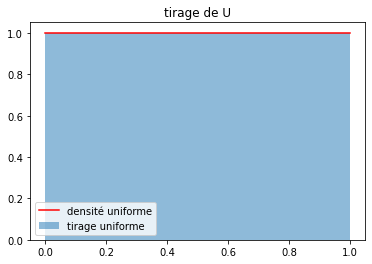

In [13]:
U = np.random.rand(N) # tirage de loi uniforme sur [0,1]

#densité d'une loi uniforme sur [0,1]
fu = lambda x : (0 <= x)*(x <= 1)

plt.hist(U, density = True, alpha=0.5, label = "tirage uniforme")

val = np.linspace(0,1)
plt.plot(val,fu(val), color = "r", label = "densité uniforme")
plt.title("tirage de U")
plt.legend()
plt.show()

### Application : Loi de Rayleigh  
Pour générer notre rayleigh, on va partir de ce que l'on a déjà. On sait générer une uniforme. A partir de cela on sait générer une loi exponentielle et à partir de là on sait générer une loi de rayleigh. On va simplement repasser par ces étapes.

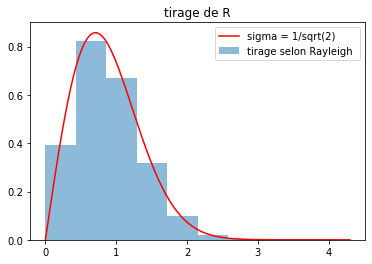

In [14]:
R = np.sqrt(-np.log(1-U))

fr = lambda r,sigma : (r/(sigma**2)) * np.exp(- 1/2 * ( (r/sigma)**2 ) ) * (r > 0) #densité rayleigh
val2 = np.linspace(np.amin(R),np.amax(R),N)

plt.hist(R, density = True, alpha = 0.5, label = "tirage selon Rayleigh ")
plt.plot(val2,fr(val2, 1/np.sqrt(2)), color = "r", label = "sigma = 1/sqrt(2)")
plt.title("tirage de R depuis uniforme")
plt.legend(loc = 1)
plt.show()

On remarque que les courbes ne fittent pas si bien que cela. On pourrait se dire que c'est parce que l'on repasse par une loi uniforme et que les calculs machines rajoutent un peu d'erreur. Donc cette fois-ci on va générer notre rayleigh à partir d'une exponentielle (grâce à numpy).

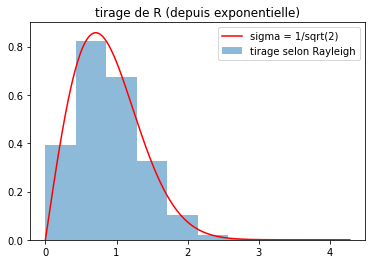

In [15]:
V = np.random.exponential(scale = 1, size = N)
Rexp = np.sqrt(V)

valexp = np.linspace(np.amin(Rexp),np.amax(Rexp),N)

plt.hist(Rexp, density = True, alpha = 0.5, label = "tirage selon Rayleigh")
plt.plot(valexp,fr(valexp, 1/np.sqrt(2)), color = "r", label = "sigma = 1/sqrt(2)")
plt.title("tirage de R (depuis exponentielle)")
plt.legend(loc= 1)
plt.show()

ça ne semble pas mieux fit mais ça valait le coup d'essayer.   
P.S : On aurait pu essayer de jouer avec le nombre de bins pour améliorer cela (visuellement).

Finalement on peut s'intéresser à l'impact de $\sigma$ sur la densité de la loi. 

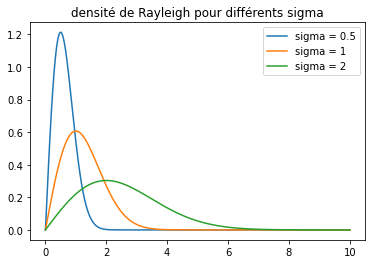

In [16]:
x = np.linspace(0,10,N)
sigmaVal = [0.5, 1, 2]
 
for i in range(len(sigmaVal)):
    plt.plot(x,fr(x,sigmaVal[i]), label = "sigma = {}".format(sigmaVal[i]))
plt.title("densité de Rayleigh pour différents sigma")
plt.legend(loc= 1)
plt.show()